In [1]:
import time
begin_start_time = time.time()
time_str = time.strftime('%Y-%m-%d %H-%M-%S', time.localtime(begin_start_time))
print(time_str)

2025-10-13 06-48-19


In [2]:
import torch, pandas as pd, os
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
from DQN.agent_eval import head_to_head, plot_winrate_bar
from pprint import pprint
import matplotlib.pyplot as plt
from DQN.h2h_to_excel import append_h2h_to_excel

In [4]:
A = "Connect4 DQN model.pt"
B = "LA1 IV DQN model.pt"

res = head_to_head(
    A, B,
    n_games=1999, 
    device=device,
    epsilon=0.0,       # no ε during eval
    guard_prob=0.0,    # guard OFF (pure Q)
    opening_noise_k=1, # you can set 1–2 if you want more variety
    seed=666,
    progress=True
)

[load] missing=0, unexpected=0
[load] matched params: 14/14
[load] missing=0, unexpected=0
[load] matched params: 14/14


Connect4 DQN model.pt vs LA1 IV DQN model.pt:   0%|          | 0/1999 [00:00<?, ?it/s]

In [5]:
pprint(res)
print(f"\nA score = {res['A_score_rate']:.3f}  (95% CI {res['A_score_CI95'][0]:.3f}–{res['A_score_CI95'][1]:.3f})")

{'A_losses': 1264,
 'A_path': 'Connect4 DQN model.pt',
 'A_score_CI95': (0.34654103022735483, 0.38882665361456614),
 'A_score_rate': 0.3676838419209605,
 'A_wins': 735,
 'B_path': 'LA1 IV DQN model.pt',
 'draws': 0,
 'games': 1999}

A score = 0.368  (95% CI 0.347–0.389)


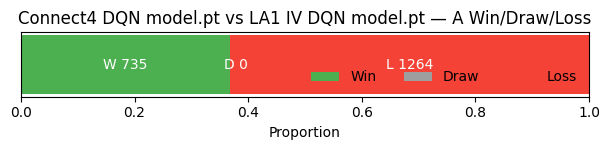

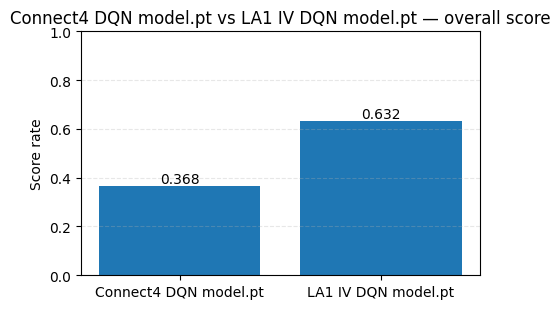

In [6]:
plot_winrate_bar(res)

In [7]:
append_h2h_to_excel(res)